In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [3]:
X.shape

(500, 2)

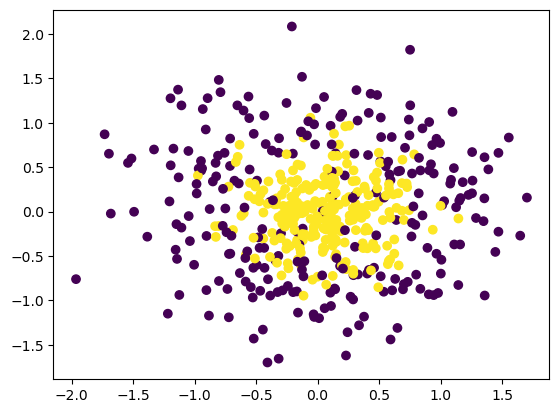

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.tree import DecisionTreeClassifier

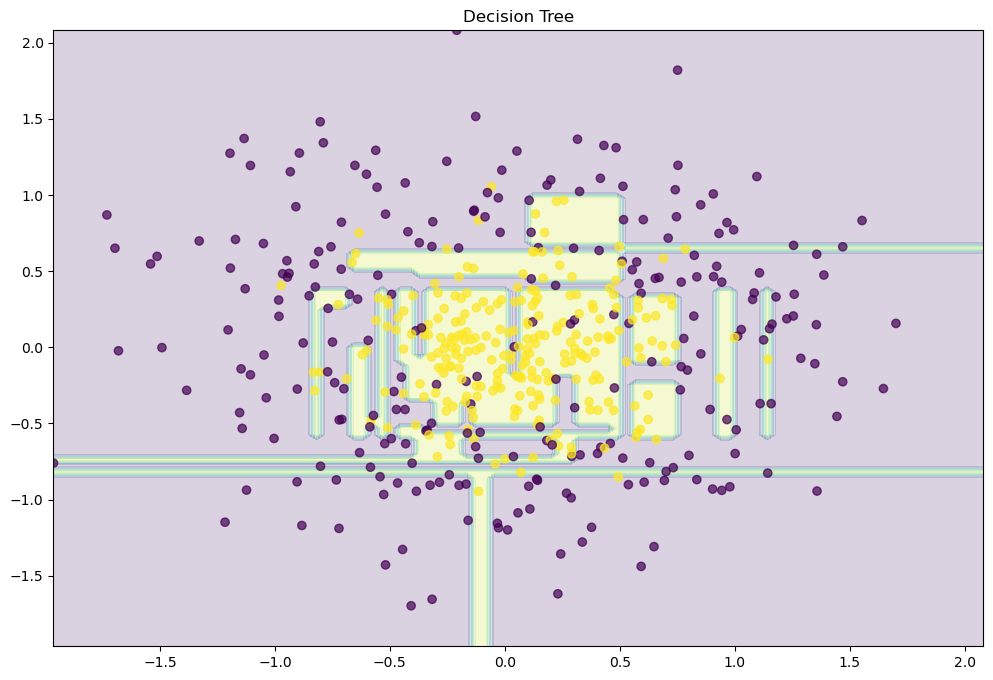

In [9]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=.7)
plt.title("Decision Tree")
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

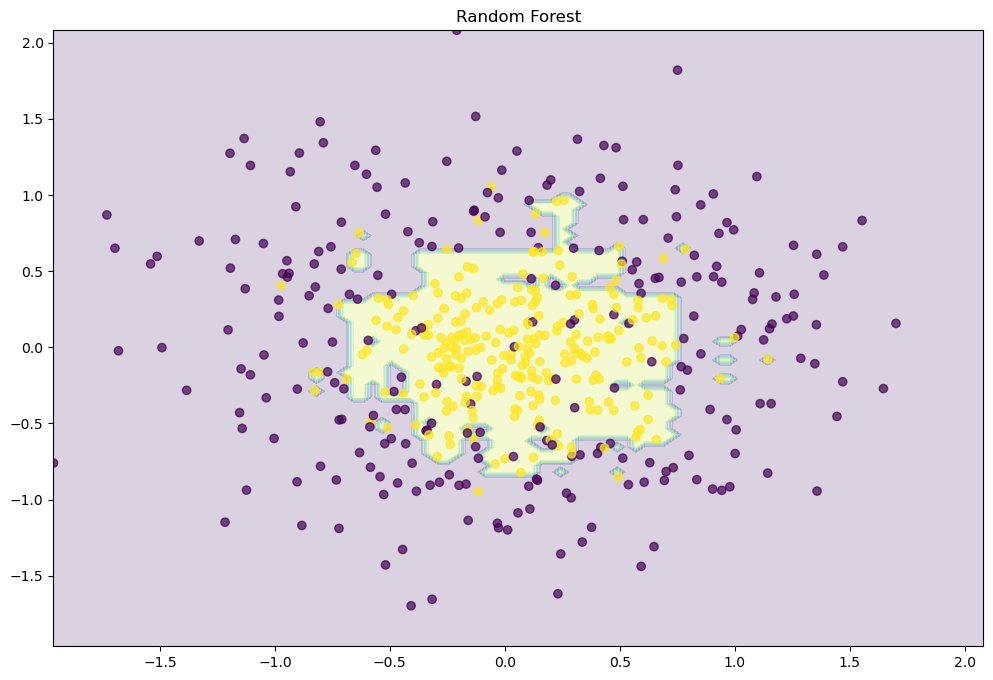

In [12]:
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=.7)
plt.title("Random Forest")
plt.show()

In [23]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate Data
def f(X):
    X = X.ravel()
    return np.exp(-X**2) + 1.5 * np.exp(-(X-2)**2)

def generate(n_samples,noise):
    X = np.random.rand(n_samples)*10-5
    X = np.sort(X).ravel()
    y = np.exp(-X**2)+1.5*np.exp(-(X-2)**2)\
        + np.random.normal(0.0,noise,n_samples)
    X = X.reshape((n_samples),1)
    
    return X,y
X_train,y_train = generate(n_samples=n_train,noise=noise)
X_test,y_test = generate(n_samples=n_test,noise=noise)


(-5.0, 5.0)

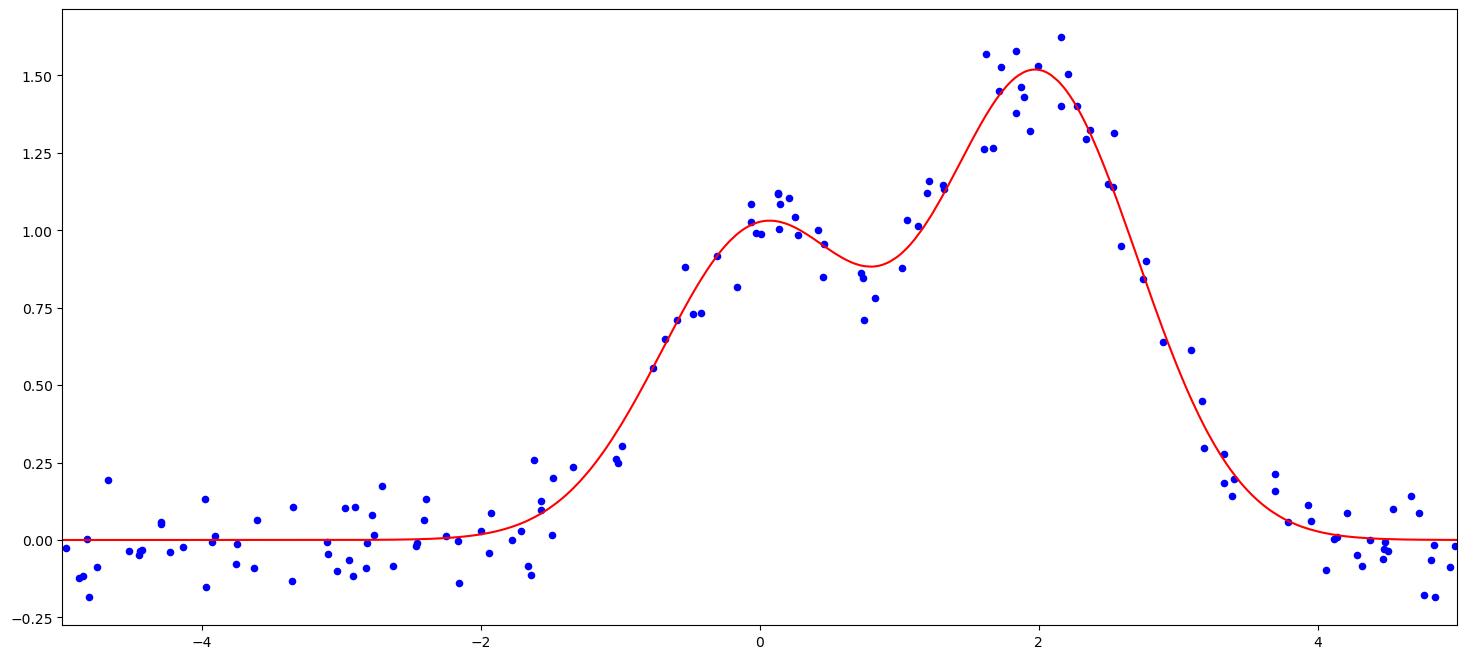

In [24]:
plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.xlim([-5,5])

In [27]:
# One Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'Decision Tree, MSE = 2.112623')

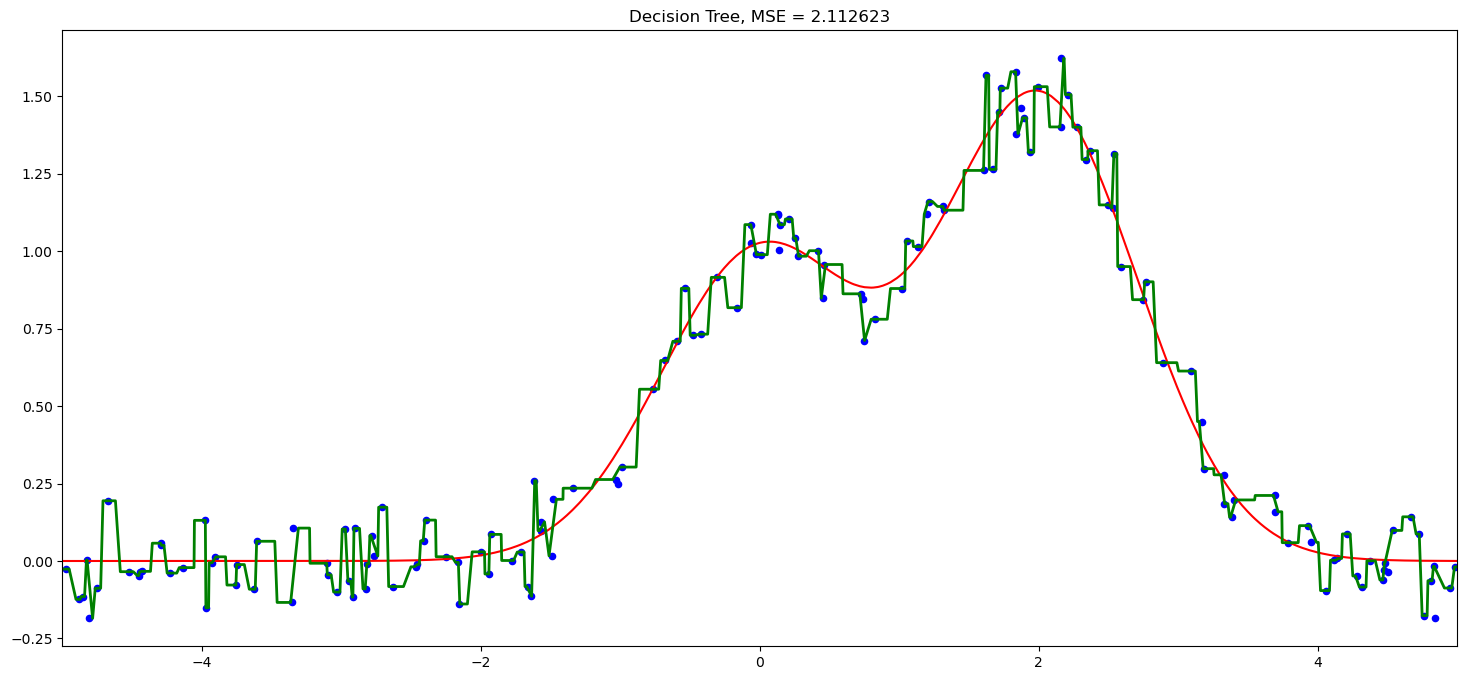

In [33]:
dtree = DecisionTreeRegressor().fit(X_train,y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,d_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Decision Tree, MSE = %2f"%np.sum(y_test-d_predict)**2)

In [17]:
# One Random Forest regressor
from sklearn.ensemble import RandomForestRegressor 

Text(0.5, 1.0, 'Random Forest, MSE = 3.262146')

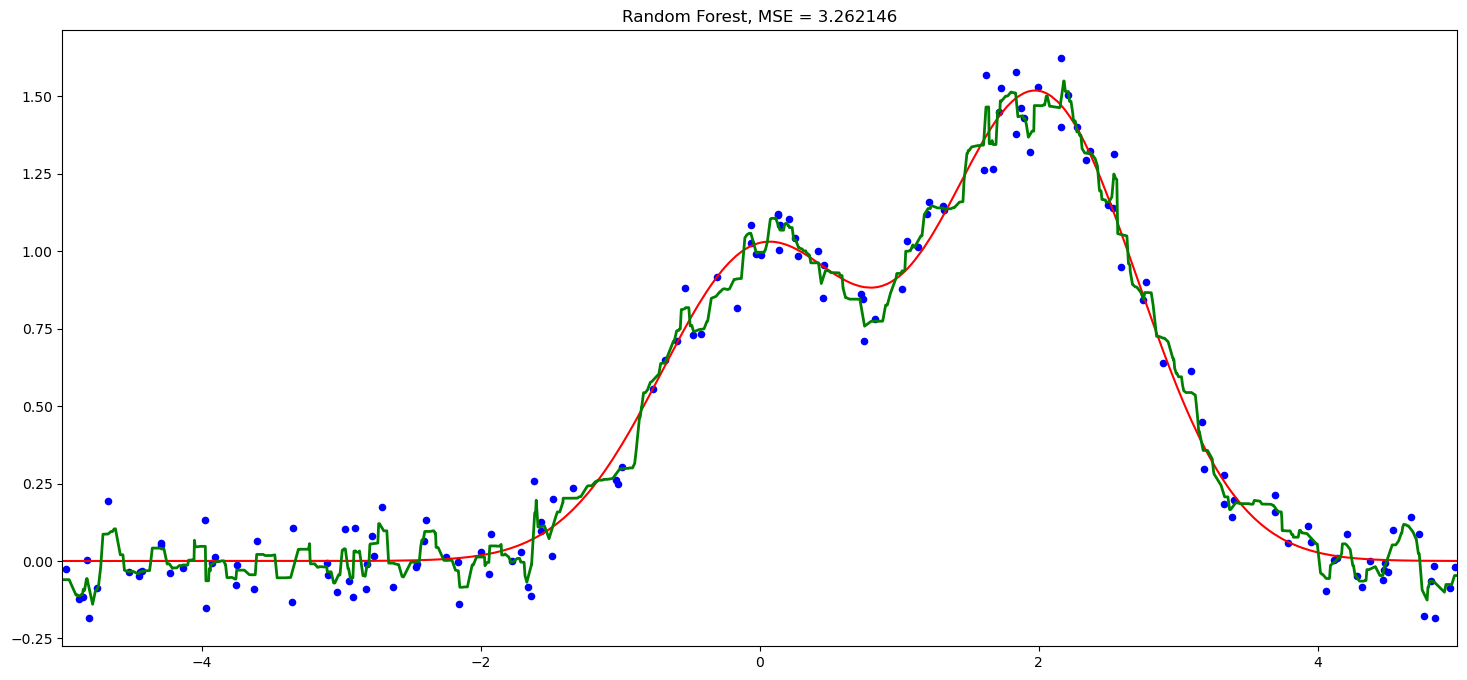

In [32]:
rfr = RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
rfr_predict = rfr.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,rfr_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Random Forest, MSE = %2f" %np.sum(y_test-rfr_predict)**2)